In [47]:
!pip install keras


     -------------------------------------- 46.2/46.2 kB 765.3 kB/s eta 0:00:00
   ---------------------------------------- 1.1/1.1 MB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 133.7/133.7 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 2.7/2.7 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 127.5/127.5 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 241.7/241.7 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 240.7/240.7 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 87.5/87.5 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 1.2/1.2 MB 5.0 MB/s eta 0:00:00


In [48]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [49]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [50]:
type(X_train) # value is between 0 to 255,  that shows this need scaling before the training

numpy.ndarray

In [51]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [52]:
X_train = X_train/255
X_test = X_test/255
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [53]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


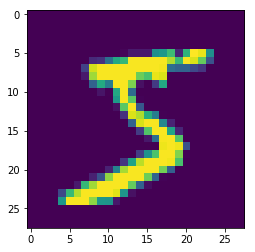

In [54]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [91]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu')) # 128 nodes - 1st hidden layer
model.add(Dense(10,activation='softmax')) # output layer, 10 nodes


In [92]:
model.summary()  # 100480 trainable parameters = 784*128 + 128

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [94]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 61us/step - loss: 0.2849 - acc: 0.9198 - val_loss: 0.1597 - val_acc: 0.9543
Epoch 2/30
48000/48000 [==============================] - 3s 55us/step - loss: 0.1224 - acc: 0.9646 - val_loss: 0.1115 - val_acc: 0.9681
Epoch 3/30
48000/48000 [==============================] - 3s 54us/step - loss: 0.0831 - acc: 0.9750 - val_loss: 0.0963 - val_acc: 0.9710
Epoch 4/30
48000/48000 [==============================] - 3s 67us/step - loss: 0.0623 - acc: 0.9808 - val_loss: 0.0966 - val_acc: 0.9710
Epoch 5/30
48000/48000 [==============================] - 4s 78us/step - loss: 0.0486 - acc: 0.9855 - val_loss: 0.0892 - val_acc: 0.9734
Epoch 6/30
48000/48000 [==============================] - 4s 75us/step - loss: 0.0376 - acc: 0.9885 - val_loss: 0.0870 - val_acc: 0.9765
Epoch 7/30
48000/48000 [==============================] - 4s 75us/step - loss: 0.0297 - acc: 0.9913 - val_loss: 0.0844 - val_acc

In [95]:
y_prob = model.predict(X_test)

In [96]:
y_pred = y_prob.argmax(axis=1)

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9803

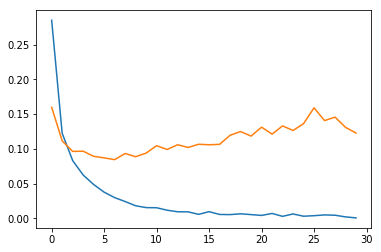

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

KeyError: 'accuracy'

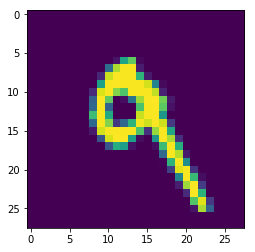

In [101]:
plt.imshow(X_test[7])

In [104]:
model.predict(X_test[7].reshape(1,28,28)).argmax(axis=1) # only for one image

array([9], dtype=int64)

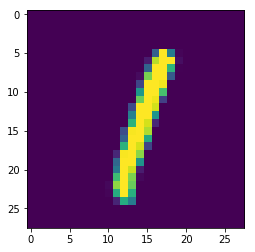

In [105]:
plt.imshow(X_test[5])

In [106]:
model.predict(X_test[5].reshape(1,28,28)).argmax(axis=1) # only for one image

array([1], dtype=int64)